In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor#can also be used for classification
from sklearn import metrics

In [2]:
#load the dataset
mart_sales_dataset = pd.read_csv('data/Train.csv')

In [3]:
mart_sales_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
mart_sales_dataset.shape

(8523, 12)

In [5]:
#getting the information about the dataset
mart_sales_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


categorical feaures:
1. item indentifier 
2. item fat _content
3. item_type
4. outlet identifier
5. outlet size
6. outlet location type
7. outlet type

In [6]:
#checking for na values
mart_sales_dataset.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

handling these missing values
1..using mean
2.using mode

In [7]:
#mean value of item weight
mart_sales_dataset['Item_Weight'].mean()

12.857645184135976

In [8]:
#filling the na values with mean value
mart_sales_dataset['Item_Weight'].fillna(12.857645184136183, inplace=True)

#using mode on cat data na

In [9]:
#mode value of outlet size
mode_of_outlet_size = mart_sales_dataset.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))

In [10]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [11]:
missing_values = mart_sales_dataset['Outlet_Size'].isna()

In [12]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [13]:
mart_sales_dataset.loc[missing_values,'Outlet_Size'] = mart_sales_dataset.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [14]:
mart_sales_dataset.isna().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

data analysis

In [15]:
mart_sales_dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


numerical features plots

In [16]:
sns.set()

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


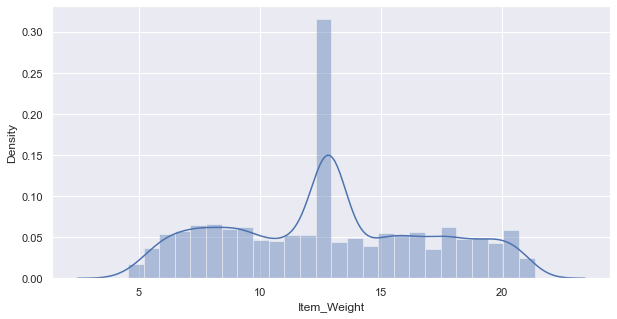

In [17]:
#item weight distribution
plt.figure(figsize=(10,5))
sns.distplot(mart_sales_dataset['Item_Weight'])
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


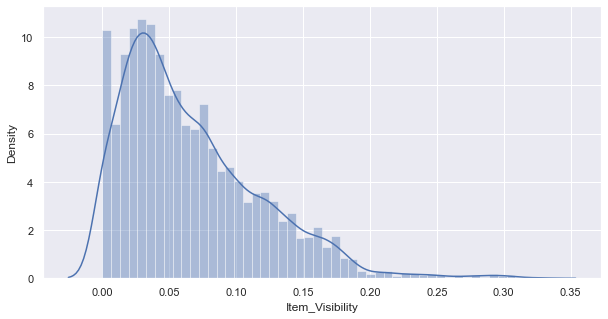

In [18]:
#item visibility distribution
plt.figure(figsize=(10,5))
sns.distplot(mart_sales_dataset['Item_Visibility'])
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


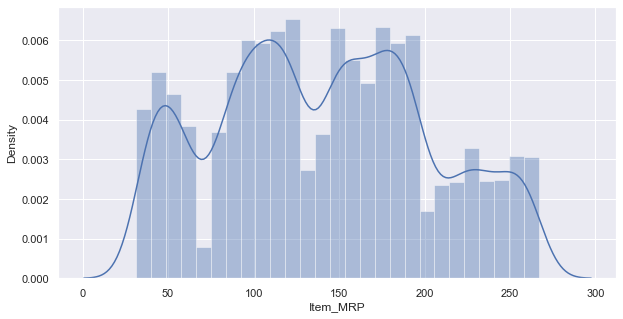

In [19]:
#item mrp distribution
plt.figure(figsize=(10,5))
sns.distplot(mart_sales_dataset['Item_MRP'])
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


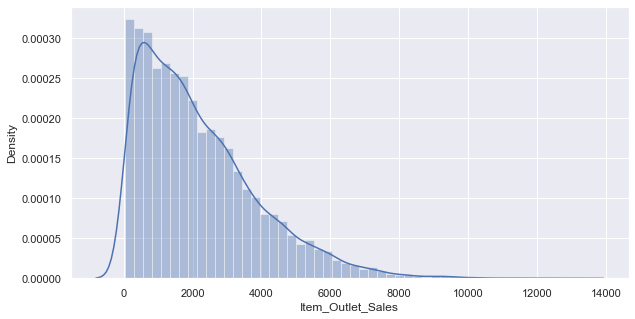

In [20]:
#item outlet sales distribution
plt.figure(figsize=(10,5))
sns.distplot(mart_sales_dataset['Item_Outlet_Sales'])
plt.show()

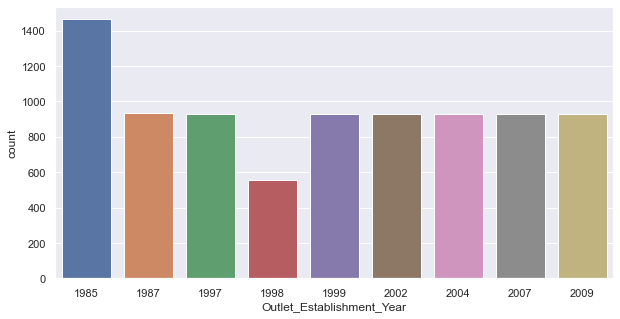

In [21]:
#outlet establishment year distribution
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Establishment_Year', data=mart_sales_dataset)
plt.show()

cat features

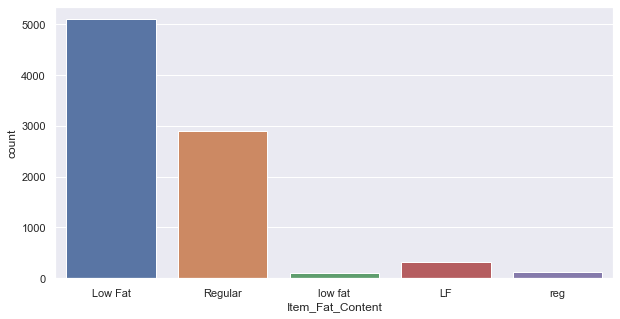

In [23]:
#item fat content distribution
plt.figure(figsize=(10,5))
sns.countplot(x='Item_Fat_Content', data=mart_sales_dataset)
plt.show()

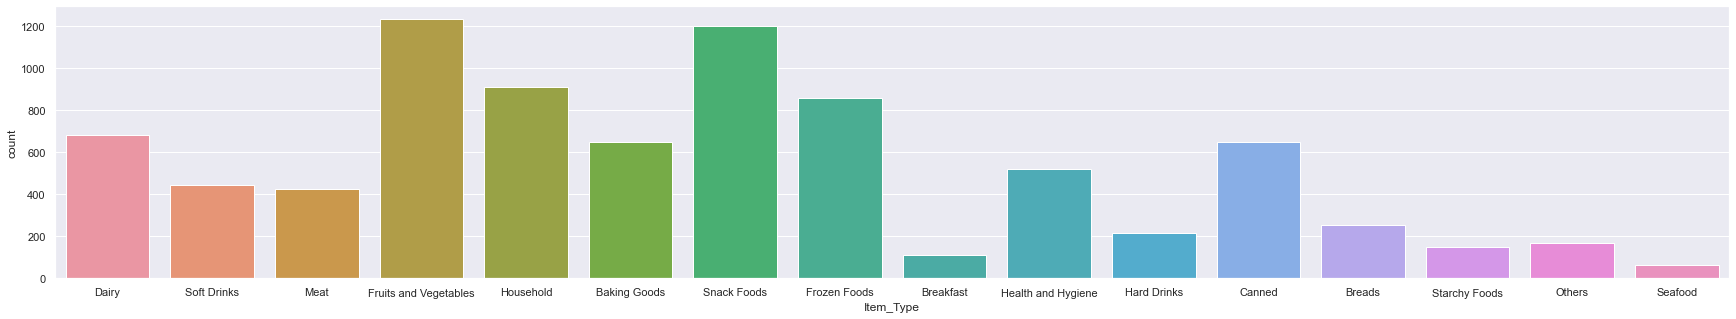

In [25]:
#item type distribution
plt.figure(figsize=(30,5))
sns.countplot(x='Item_Type', data=mart_sales_dataset)
plt.show()

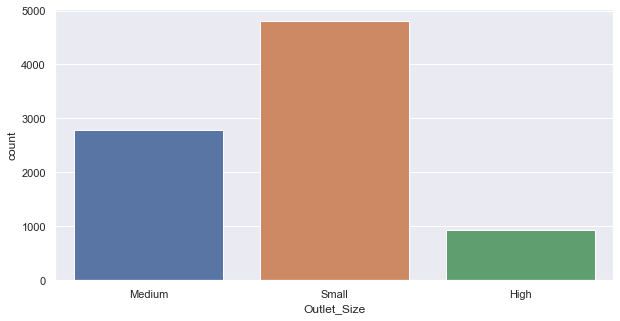

In [26]:
#outlet size distribution
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Size', data=mart_sales_dataset)
plt.show()

In [27]:
mart_sales_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
mart_sales_dataset['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [29]:
mart_sales_dataset.replace({'Item_Fat_Content':{'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'}}, inplace=True)

In [30]:
mart_sales_dataset['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

now we do label encoding

In [31]:
encoder = LabelEncoder()

In [32]:
# categorical feaures:
# 1. item indentifier 
# 2. item fat _content - low fat, regular
# 3. item_type- food, drinks, non-consumable
# 4. outlet identifier
# 5. outlet size- small, medium, high
# 6. outlet location type-
# 7. outlet type-

#encoding the categorical variables
mart_sales_dataset['Item_Fat_Content'] = encoder.fit_transform(mart_sales_dataset['Item_Fat_Content'])
mart_sales_dataset['Item_Type'] = encoder.fit_transform(mart_sales_dataset['Item_Type'])
mart_sales_dataset['Outlet_Size'] = encoder.fit_transform(mart_sales_dataset['Outlet_Size'])
mart_sales_dataset['Outlet_Location_Type'] = encoder.fit_transform(mart_sales_dataset['Outlet_Location_Type'])
mart_sales_dataset['Outlet_Type'] = encoder.fit_transform(mart_sales_dataset['Outlet_Type'])
mart_sales_dataset['Outlet_Identifier'] = encoder.fit_transform(mart_sales_dataset['Outlet_Identifier'])
mart_sales_dataset['Item_Identifier'] = encoder.fit_transform(mart_sales_dataset['Item_Identifier'])


In [33]:
mart_sales_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [34]:
mart_sales_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 566.1 KB


In [35]:
#splitting into features and labels
X = mart_sales_dataset.drop(columns=['Item_Outlet_Sales'], axis=1)
y = mart_sales_dataset['Item_Outlet_Sales']

In [36]:
#splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [37]:
#training the model
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [38]:
#evaluating the model
#prediction on training data
training_data_prediction = model.predict(X_train)
#R squared error
error_score = metrics.r2_score(y_train, training_data_prediction)
print('R squared error: ', error_score)


R squared error:  0.8639680373364909


In [39]:
#prediction on test data
test_data_prediction = model.predict(X_test)
#R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print('R squared error: ', error_score)

R squared error:  0.5233136709735687
